## Perceptron Calculation using Iris dataset

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [34]:
df = pd.read_csv('iris.data') # load the data

In [35]:
df.head() # show the first 5 rows of the data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [36]:
# rename the columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [38]:
# sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
df.drop(['sepal_length', 'sepal_width'], axis=1, inplace=True)


In [39]:
df.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa


In [40]:
df = df[df['species'] != 'Iris-versicolor']
df.head()

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa


<Axes: xlabel='petal_length', ylabel='petal_width'>

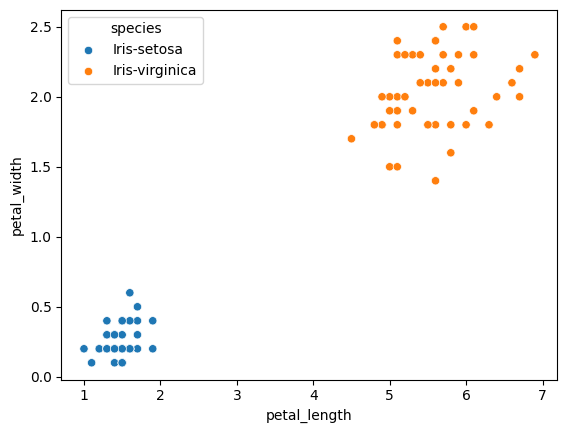

In [41]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')

labeling the species : <br>
if the species is Iris-setosa than the Perceptron will return -1 else will resturn 1 for Iris-virginica

In [42]:
# Encode species labels (Iris-setosa = -1, Iris-virginica = 1)
df["species"] = df["species"].apply(lambda x: -1 if x == "Iris-setosa" else 1)

In [43]:
# Prepare data
X = df[["petal_length", "petal_width"]].values
y = df["species"].values

In [44]:
# Initialize perceptron parameters
weights = np.zeros(2)  # Two weights (for petal_length and petal_width)
bias = 0
learning_rate = 0.1
epochs = 100

Training Perceptron

In [45]:
# Perceptron Training
for epoch in range(epochs):
    for i in range(len(y)):
        prediction = np.dot(weights, X[i]) + bias  # Linear function (w*x + b)------ the line boundary
        predicted_label = 1 if prediction > 0 else -1  # Step function or activation function
        
        # Update rule: w = w + learning_rate * (actual - predicted) * x
        if predicted_label != y[i]:  
            weights += learning_rate * y[i] * X[i]
            bias += learning_rate * y[i]
    print(f"Epoch {epoch+1}, Sample {i+1}, Weights: {weights}, Bias: {bias}")

Epoch 1, Sample 99, Weights: [0.6  0.25], Bias: 0.1
Epoch 2, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 3, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 4, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 5, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 6, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 7, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 8, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 9, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 10, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 11, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 12, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 13, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 14, Sample 99, Weights: [0.04 0.17], Bias: -0.30000000000000004
Epoch 15, Sample 99, Weights: [0.04 0.17], Bia

So, the calculated weight for Patel_length (w1)=0.04, weight for Patel_width (w2)=0.17 and the bisa (b) = -0.304

In [46]:
# Define decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


In [47]:
# decision boundary (w1 * x + w2 * y + bias = 0) -> y = (-w1/w2) * x - (bias/w2)
Z = np.sign(weights[0] * xx + weights[1] * yy + bias)


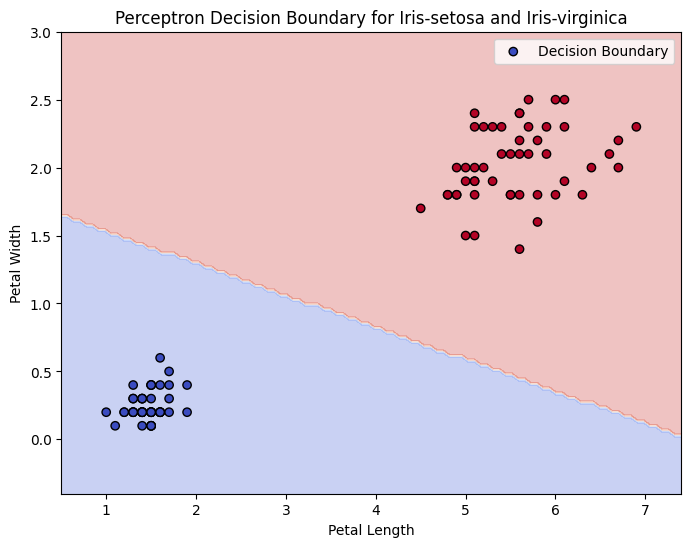

In [48]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
# Scatter plot of actual data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", marker="o", label="Data Points")
# Labels and title
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Perceptron Decision Boundary for Iris-setosa and Iris-virginica")
plt.legend(["Decision Boundary", "Iris-setosa", "Iris-virginica"])
plt.show()
